In [2]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib inline




from modsim import *

In [3]:
init = State(t=0)
init

,value
t,0


In [4]:
downforce = System(init=init,
                   cod=.72
                  )
downforce

,value
init,t 0 dtype: int64
cod,0.72


In [5]:
def update(state, system):
    """Update the thermal transfer model.
    
    state: State (temp)
    system: System object
    
    returns: State (temp)
    """
    unpack(system)
    T = state.t
    #T += 1
    df= (0.5*(T**2)*0.72)

    return df

In [6]:
update(init, downforce)

0.0

In [7]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.loc[0] = init
    ts = linrange(0, 130, 1)
    
    for t in ts:
        frame.loc[t+1] = df= (0.5*(t**2)*0.72)
    
    system.results = frame

In [7]:
run_simulation(downforce,update)
downforce.results

,t
0,0.00
1,0.00
2,0.36
3,1.44
4,3.24
5,5.76
6,9.00
7,12.96
8,17.64
9,23.04


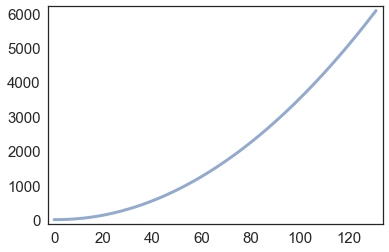

In [8]:
plot(downforce.results)

In [9]:
data1 = pd.read_csv('Torque_curve.csv',index_col='RPM')
data1


,Torque
RPM,
8756.147541,220.693752
8807.377049,223.237408
8838.114754,224.509979
8868.852459,224.514433
8899.590164,227.055120
8909.836066,227.056605
8971.311475,228.333630
8971.311475,228.333630
9053.278689,232.149857


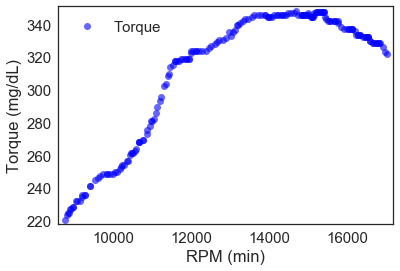

In [12]:
plot(data1, 'bo', label='Torque')
decorate(xlabel='RPM (min)',
         ylabel='Torque (mg/dL)')

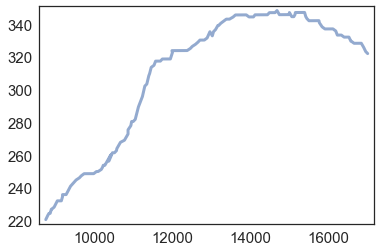

In [11]:
plot(data)

In [13]:
I1 = interpolate(data1.Torque, kind ='linear')

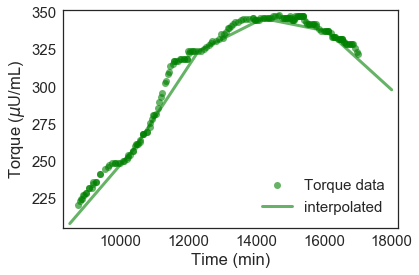

In [14]:
ts = linrange(8500, 18000, 2000)

plot(data1.Torque, 'go', label='Torque data')
plot(ts, I1(ts), color='green', label='interpolated')

decorate(xlabel='Time (min)',
         ylabel='Torque ($\mu$U/mL)')



In [14]:
I = interpolate(downforce.results.t,kind='cubic')

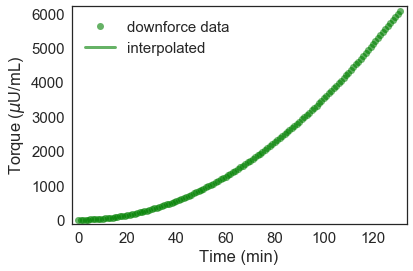

In [15]:
ts = linrange(1, 100, 1000)

plot(downforce.results, 'go', label='downforce data')
plot(ts, I(ts), color='green', label='interpolated')

decorate(xlabel='Time (min)',
         ylabel='Torque ($\mu$U/mL)')


In [17]:
data = pd.read_csv('Gear_ratios.csv',index_col='Speed')
data

,RPM
Speed,
0.122448,6388.837401
1.627208,6420.745921
1.929958,6452.548344
1.929958,6452.548344
2.839329,6563.843564
2.841576,6595.619463
3.748701,6675.138784
4.954082,6722.908729
6.160586,6786.566624


In [19]:
I = interpolate(data.RPM,kind='linear')

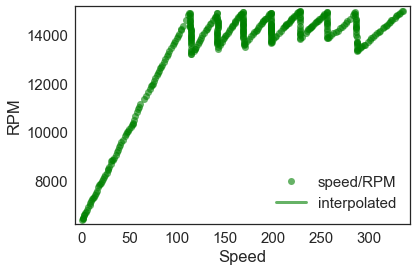

In [21]:
ts = linrange(1, 300, 1000)

plot(data, 'go', label='speed/RPM')
plot(ts, I(ts), color='green', label='interpolated')

decorate(xlabel='Speed',
         ylabel='RPM')



In [26]:
I(335)

array(14973.6158648135)